In [1]:
import pandas as pd

# Load feature-engineered dataset
df = pd.read_csv("health_insurance_features_engineered.csv")

# Quick check
print("Dataset shape:", df.shape)
print(df.head())
print(df.info())


Dataset shape: (1000, 27)
  Customerid  Age  Gender   Bmi Smoker     Region  Children  Annual_Income  \
0      H0001   56    Male  27.9     No  Southwest         1          39130   
1      H0002   69    Male  33.9     No  Southwest         1         119360   
2      H0003   46    Male  40.6     No  Southeast         1          92287   
3      H0004   32  Female  25.3     No  Northeast         0          81702   
4      H0005   60    Male  25.6     No  Southeast         4          66993   

   Claim_History  Annual_Premium  ... Is_Female High_claim_history_flag  \
0              3            3246  ...         0                       1   
1              1            7825  ...         0                       0   
2              2            9516  ...         0                       0   
3              1            3416  ...         1                       0   
4              2            9702  ...         0                       0   

  Is_Obese Smoker_Obese  Risk_Score_raw  Risk_Score  L

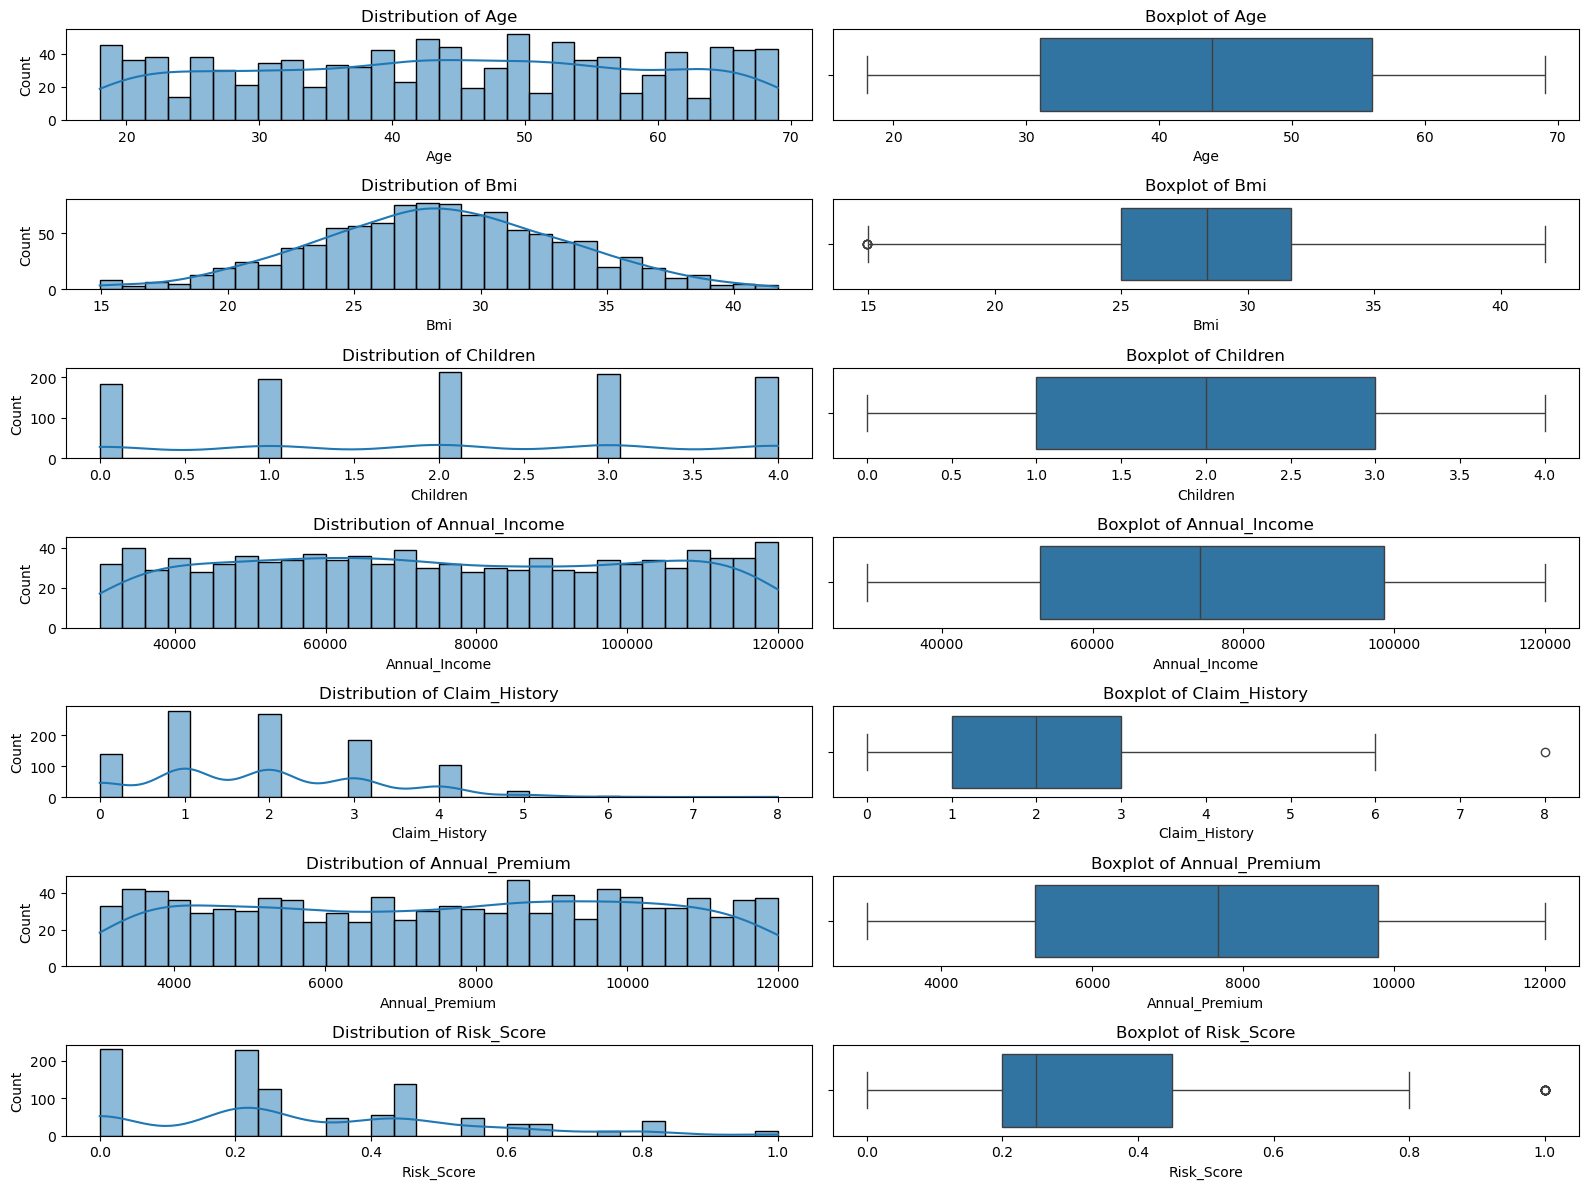

In [2]:
#univariate analysis for numerical features
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Age', 'Bmi', 'Children', 'Annual_Income',
            'Claim_History', 'Annual_Premium', 'Risk_Score']

plt.figure(figsize=(16, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 2, 2*i-1)   # histogram
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

    plt.subplot(len(num_cols), 2, 2*i)     # boxplot
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


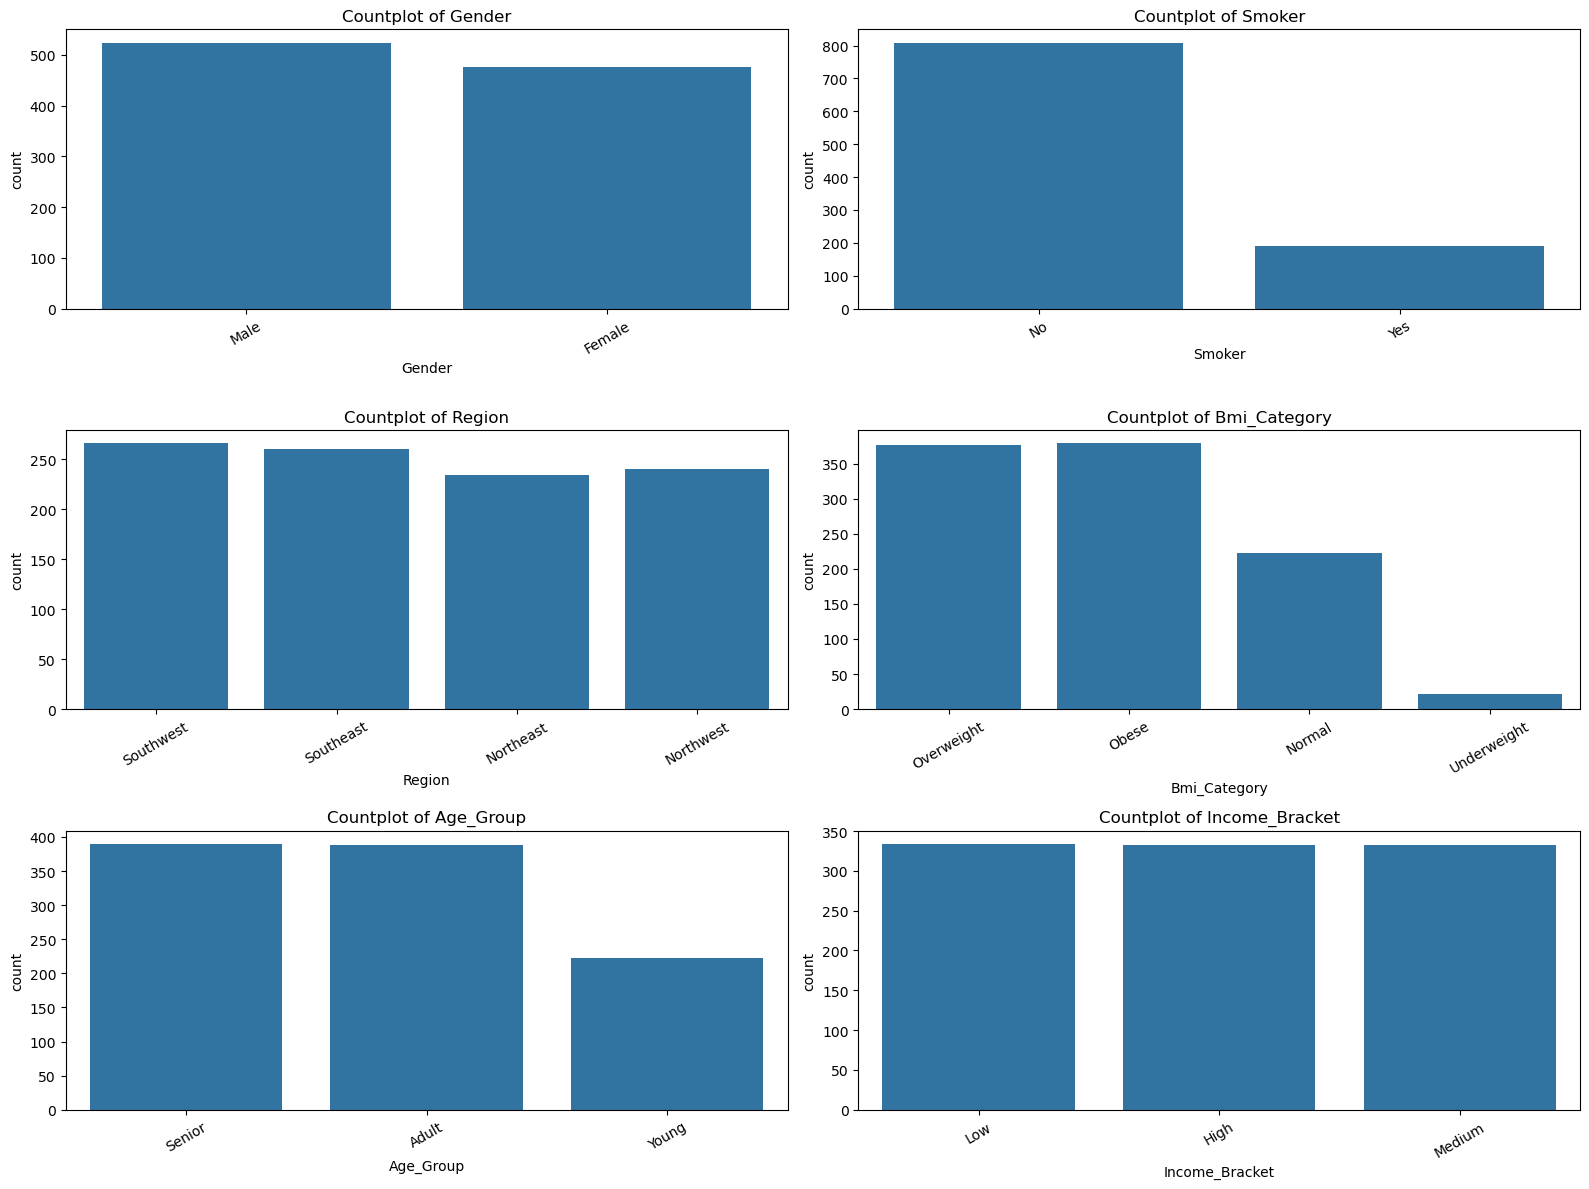

In [3]:
#Categorical features → bar plots
cat_cols = ['Gender', 'Smoker', 'Region', 'Bmi_Category',
            'Age_Group', 'Income_Bracket']

plt.figure(figsize=(16, 12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=df[col])
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


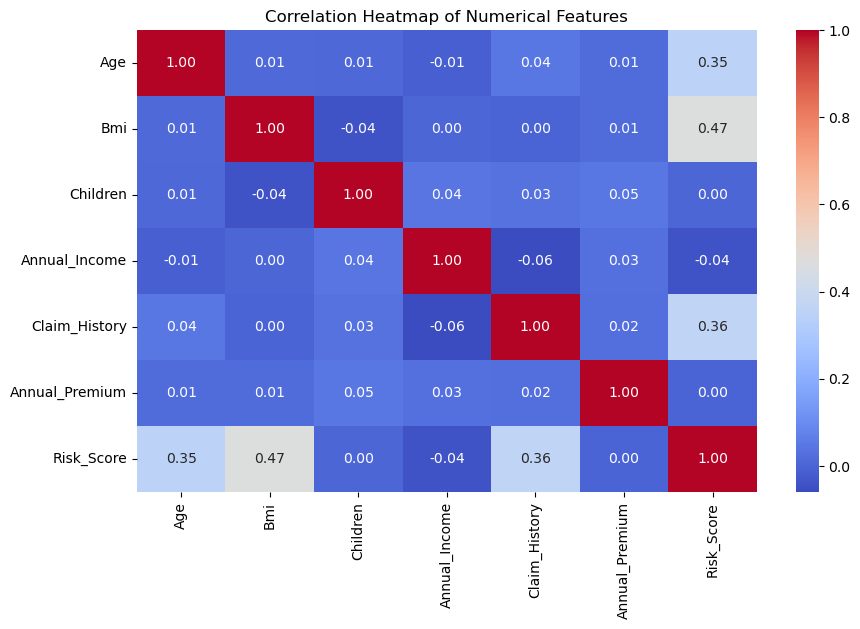

In [4]:
#Bivariate -coreelation analysis
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


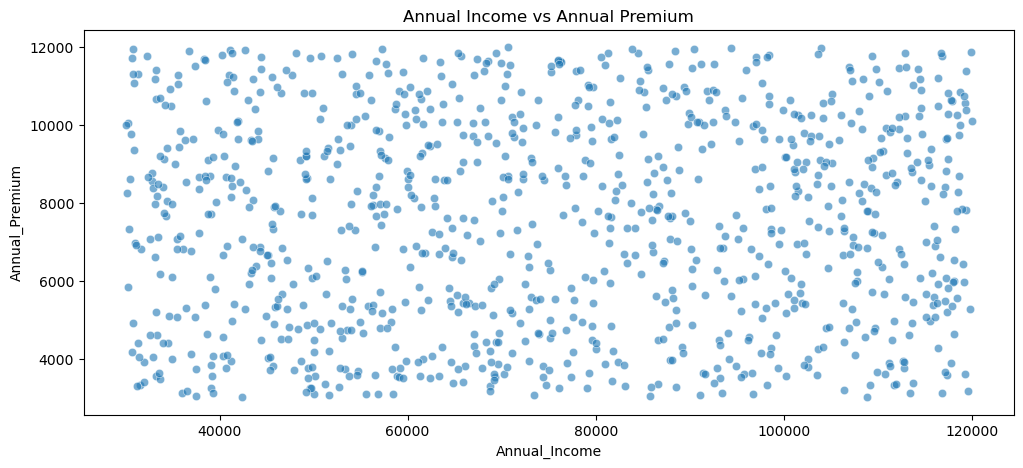

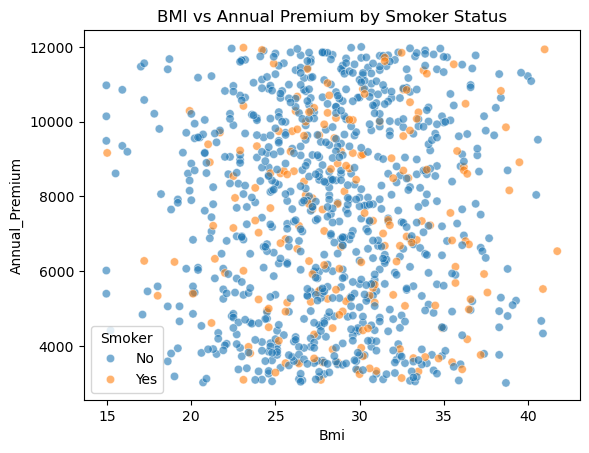

In [5]:
#Scatterplots for important pairs
plt.figure(figsize=(12, 5))

sns.scatterplot(x='Annual_Income', y='Annual_Premium', data=df, alpha=0.6)
plt.title("Annual Income vs Annual Premium")
plt.show()

sns.scatterplot(x='Bmi', y='Annual_Premium', hue='Smoker', data=df, alpha=0.6)
plt.title("BMI vs Annual Premium by Smoker Status")
plt.show()


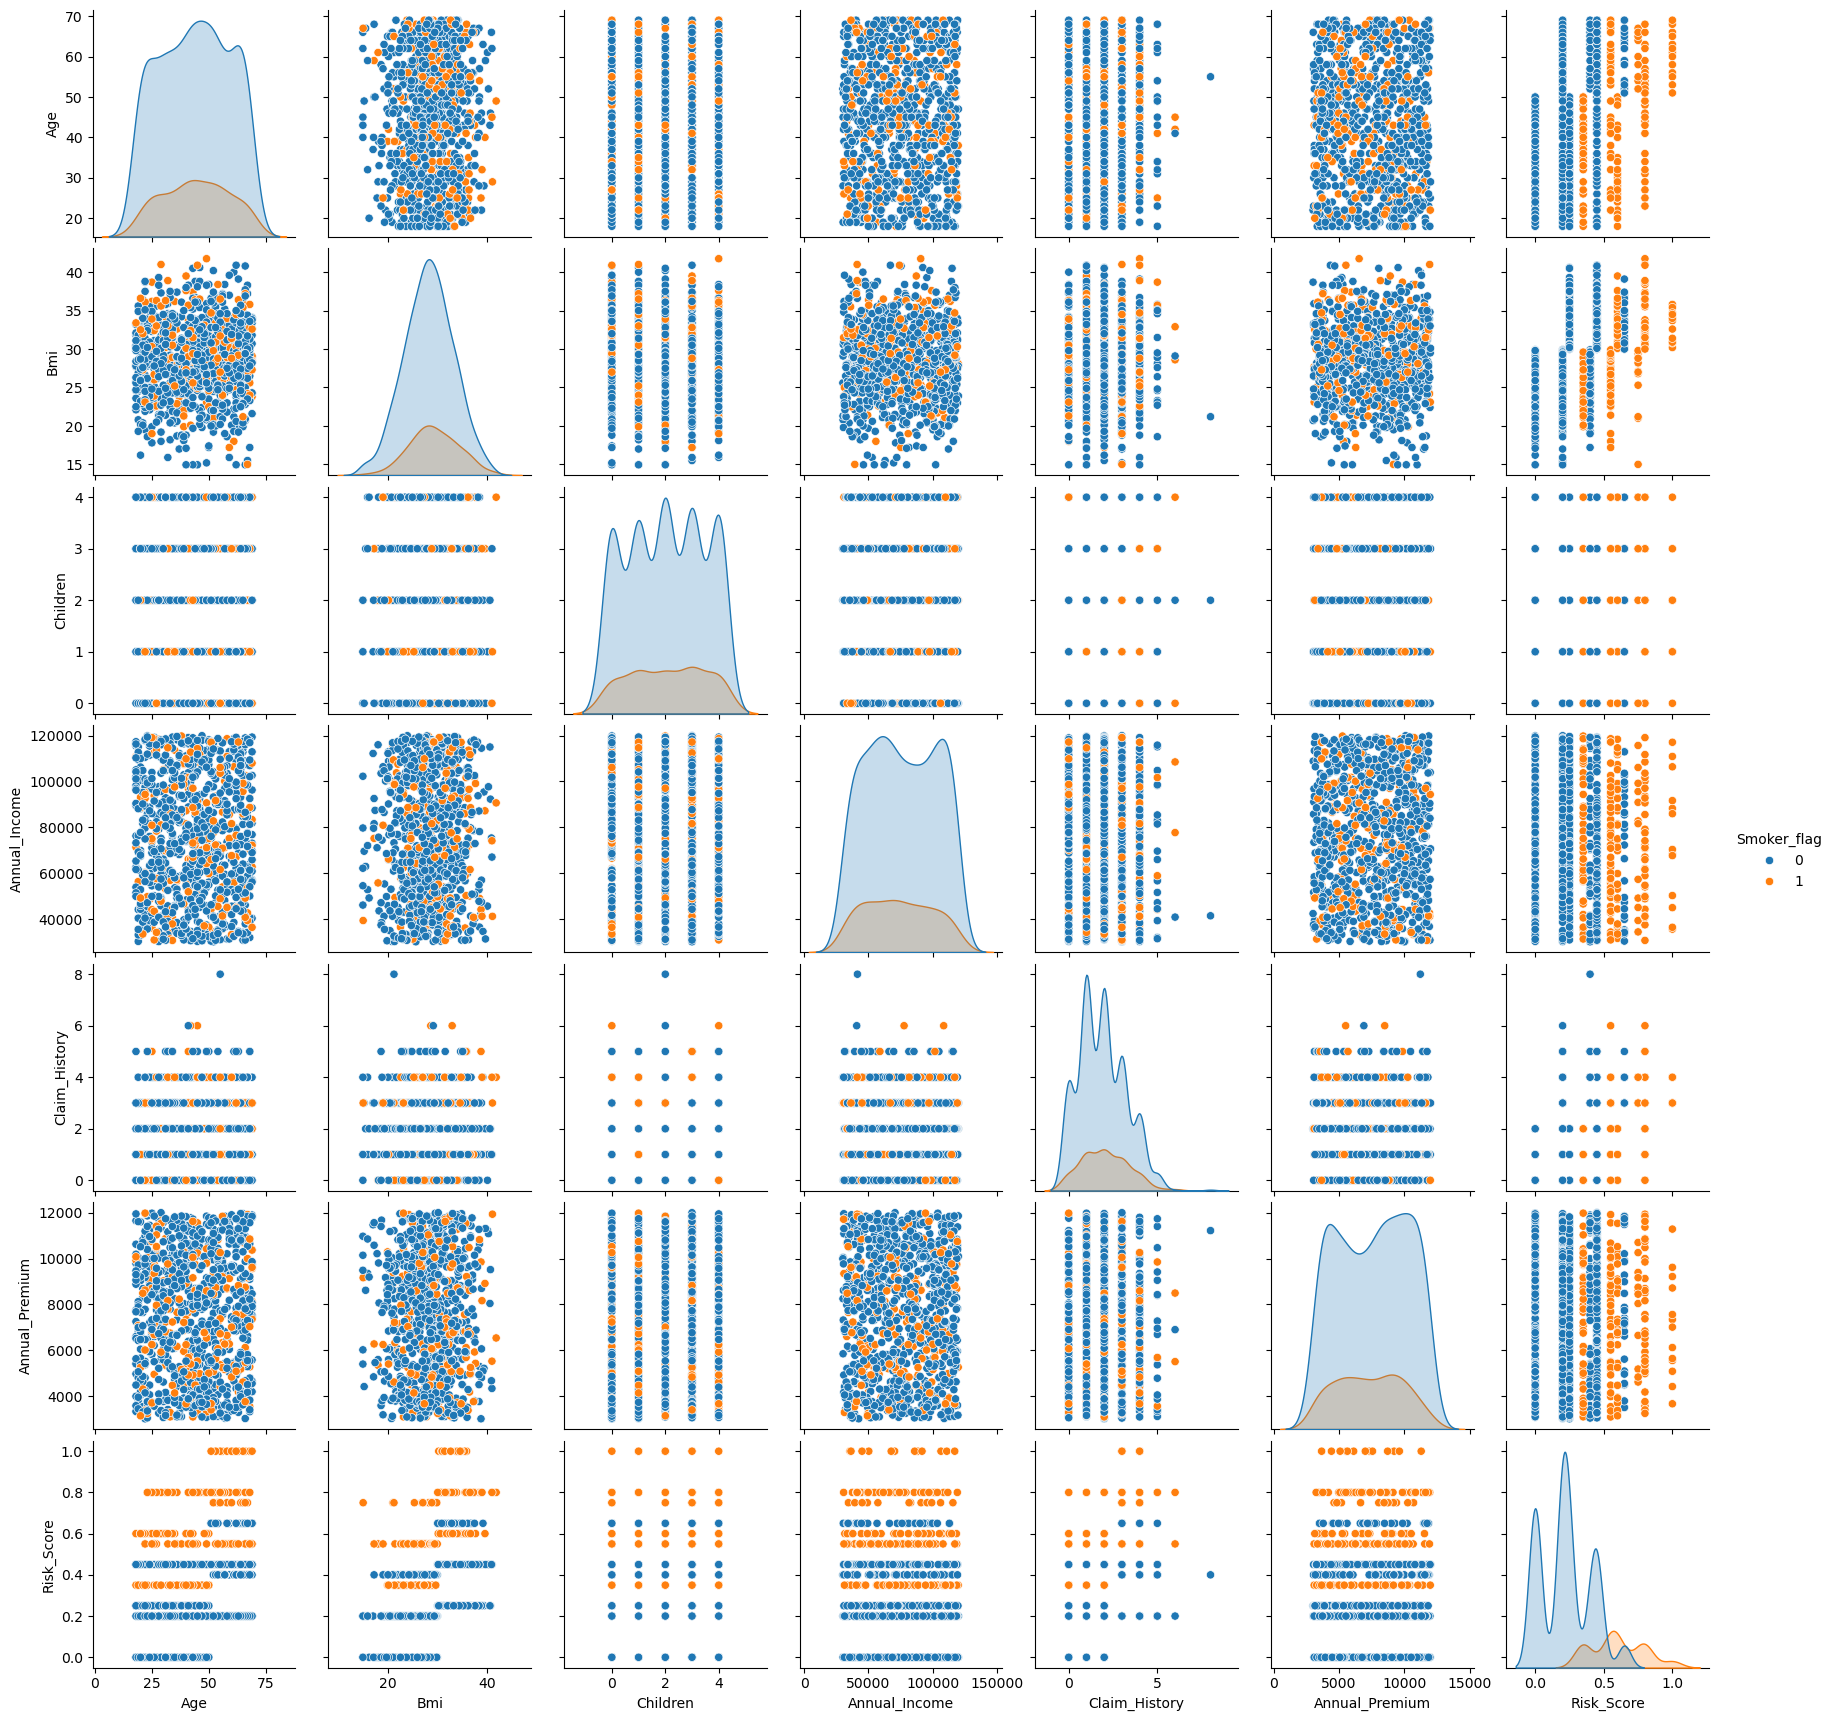

In [6]:
#Multivariate Analysis
sns.pairplot(df[num_cols + ['Smoker_flag']], hue="Smoker_flag")
plt.show()


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load engineered dataset
df = pd.read_csv("health_insurance_features_engineered.csv")

# Step 1: Drop redundant raw categorical columns
df_model = df.drop(columns=['Gender', 'Smoker'])

# Step 2: One-hot encode categorical features
df_encoded = pd.get_dummies(
    df_model,
    columns=['Region', 'Bmi_Category', 'Age_Group', 'Income_Bracket'],
    drop_first=True
)

# Step 3: Scale numerical continuous features
num_cols = ['Age', 'Bmi', 'Children', 'Annual_Income',
            'Claim_History', 'Annual_Premium', 'Risk_Score']

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

print("✅ Encoded & Scaled dataset shape:", df_encoded.shape)
print(df_encoded.head())


✅ Encoded & Scaled dataset shape: (1000, 31)
  Customerid       Age       Bmi  Children  Annual_Income  Claim_History  \
0      H0001  0.812959 -0.102364 -0.751549      -1.368349       0.831723   
1      H0002  1.680578  1.112157 -0.751549       1.666007      -0.701407   
2      H0003  0.145560  2.468372 -0.751549       0.642087       0.065158   
3      H0004 -0.788799 -0.628656 -1.469361       0.241755      -0.701407   
4      H0005  1.079919 -0.567930  1.401887      -0.314550       0.065158   

   Annual_Premium High_Cost_Claim  Income_per_Child  Premium_to_Income_Ratio  \
0       -1.616902              No           19565.0                 0.082954   
1        0.116547             Yes           59680.0                 0.065558   
2        0.756701              No           46143.5                 0.103113   
3       -1.552546              No           81702.0                 0.041810   
4        0.827114              No           13398.6                 0.144821   

   ...  Region_No

In [8]:
# Convert all boolean columns to integers (0/1)
for col in df_encoded.select_dtypes(include=['bool']).columns:
    df_encoded[col] = df_encoded[col].astype(int)

print("✅ Converted all boolean columns to 0/1")
print(df_encoded.head())


✅ Converted all boolean columns to 0/1
  Customerid       Age       Bmi  Children  Annual_Income  Claim_History  \
0      H0001  0.812959 -0.102364 -0.751549      -1.368349       0.831723   
1      H0002  1.680578  1.112157 -0.751549       1.666007      -0.701407   
2      H0003  0.145560  2.468372 -0.751549       0.642087       0.065158   
3      H0004 -0.788799 -0.628656 -1.469361       0.241755      -0.701407   
4      H0005  1.079919 -0.567930  1.401887      -0.314550       0.065158   

   Annual_Premium High_Cost_Claim  Income_per_Child  Premium_to_Income_Ratio  \
0       -1.616902              No           19565.0                 0.082954   
1        0.116547             Yes           59680.0                 0.065558   
2        0.756701              No           46143.5                 0.103113   
3       -1.552546              No           81702.0                 0.041810   
4        0.827114              No           13398.6                 0.144821   

   ...  Region_Northwes

In [10]:
# Convert High_Cost_Claim to 0/1
df_encoded['High_Cost_Claim'] = (
    df['High_Cost_Claim'].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})
).fillna(0).astype(int)

print(df_encoded[['High_Cost_Claim']].head())



   High_Cost_Claim
0                0
1                1
2                0
3                0
4                0


In [11]:
df_encoded.to_csv("health_insurance_encoded_scaled3.csv", index=False)
print("✅ Saved: health_insurance_encoded_scaled.csv")


✅ Saved: health_insurance_encoded_scaled.csv
